# Trabajo práctico integrador - Análisis de Datos

#### Alumnos: Matias Werbin, Noelia Qualindi
##### Cohorte 14 - 1er Bimestre - Año 2024

## Importación de librerias a utilizar en el analisis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Análisis explotario

El archivo csv que se utilizará en este TP integrador fue descargado de la siguiente url: 
[Dataset weather Australia](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### Creación de dataframe aus_weather

In [2]:
aus_weather = pd.read_csv("weather_aus.csv")


### Inspección del dataframe aus_weather

In [3]:
aus_weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
print('La forma del dataframe es:', aus_weather.shape) # forma del dataframe
print('La longitud o cantidad de filas (registros) del dataframe es:',len(aus_weather)) # Equivalente aus_weather.shape[0]
print('La cantidad de columnas en el dataframe es:', aus_weather.shape[1])
print('El índice del DataFrame:', aus_weather.index)


La forma del dataframe es: (145460, 23)
La longitud o cantidad de filas (registros) del dataframe es: 145460
La cantidad de columnas en el dataframe es: 23
El índice del DataFrame: RangeIndex(start=0, stop=145460, step=1)


### Descripción y análisis variables:

 **Descripción de los Datos**
- **Date**: Fecha del registro
- **Location**: Nombre de la ciudad de Australia.
- **MinTemp**: Temperatura mínima durante un día específico. (grados Celsius)
- **MaxTemp**: Temperatura máxima durante un día específico. (grados Celsius)
- **Rainfall**: Lluvia durante un día específico. (milímetros)
- **Evaporation**: Evaporación durante un día específico. (milímetros)
- **Sunshine**: Horas de sol brillante durante un día específico. (horas)
- **WindGusDir**: La dirección de la ráfaga más fuerte durante un día específico. (16 puntos cardinales)
- **WindGuSpeed**: Velocidad de la ráfaga más fuerte durante un día específico. (kilómetros por hora)
- **WindDir9am**: La dirección del viento 10 minutos antes de las 9 am. (puntos cardinales)
- **WindDir3pm**: La dirección del viento 10 minutos antes de las 3 pm. (puntos cardinales)
- **WindSpeed9am**: Velocidad del viento 10 minutos antes de las 9 am. (kilómetros por hora)
- **WindSpeed3pm**: Velocidad del viento 10 minutos antes de las 3 pm. (kilómetros por hora)
- **Humidity9am**: Humedad del viento a las 9 am. (porcentaje)
- **Humidity3pm**: Humedad del viento a las 3 pm. (porcentaje)
- **Pressure9am**: Presión atmosférica a las 9 am. (hectopascales)
- **Pressure3pm**: Presión atmosférica a las 3 pm. (hectopascales)
- **Cloud9am**: Porcentaje de cielo cubierto por nubes a las 9 am. (octavos)
- **Cloud3pm**: Porcentaje de cielo cubierto por nubes a las 3 pm. (octavos)
- **Temp9am**: Temperatura a las 9 am. (grados Celsius)
- **Temp3pm**: Temperatura a las 3 pm. (grados Celsius)
- **RainToday**: Si hoy llueve entonces 'Sí'. Si hoy no llueve entonces 'No'.
- **RainTomorrow**: Si mañana llueve entonces 1 (Sí). Si mañana no llueve entonces 0 (No).


In [5]:
# Para visualizarlas en pyhton:
columnas=aus_weather.columns

print("Las columnas/variebales del dataframe son:")
print("")
for i in columnas:
    print(i)

Las columnas/variebales del dataframe son:

Date
Location
MinTemp
MaxTemp
Rainfall
Evaporation
Sunshine
WindGustDir
WindGustSpeed
WindDir9am
WindDir3pm
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Cloud9am
Cloud3pm
Temp9am
Temp3pm
RainToday
RainTomorrow


#### Revisión de tipos de datos de cada atributo

**Con el metodo .info() de pandas podemos tener visión general rápida y útil de la estructura y la integridad de los datos en el DataFrame (indices, números de columnas, tipo de datos y cantidad de valores no nulos en cada columna)**

In [6]:

aus_weather.info() # se puede observar 145460 registros, 23 columnas y que en muchas columnas tenemos valores ausentes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Alternativamente, lo podemos ver con un bucle for recorriendo columnas (aca solo vemos el tipo de datos)**

In [7]:

for i in columnas:
    print(f"El tipo de dato de la columna {i} es {type(aus_weather[i].iloc[0]).__name__}")


El tipo de dato de la columna Date es str
El tipo de dato de la columna Location es str
El tipo de dato de la columna MinTemp es float64
El tipo de dato de la columna MaxTemp es float64
El tipo de dato de la columna Rainfall es float64
El tipo de dato de la columna Evaporation es float64
El tipo de dato de la columna Sunshine es float64
El tipo de dato de la columna WindGustDir es str
El tipo de dato de la columna WindGustSpeed es float64
El tipo de dato de la columna WindDir9am es str
El tipo de dato de la columna WindDir3pm es str
El tipo de dato de la columna WindSpeed9am es float64
El tipo de dato de la columna WindSpeed3pm es float64
El tipo de dato de la columna Humidity9am es float64
El tipo de dato de la columna Humidity3pm es float64
El tipo de dato de la columna Pressure9am es float64
El tipo de dato de la columna Pressure3pm es float64
El tipo de dato de la columna Cloud9am es float64
El tipo de dato de la columna Cloud3pm es float64
El tipo de dato de la columna Temp9am es 

**El anterior código refleja el tipo de datos segun python. Ahora, clasificaremos las variables segun si son CUALITATIVAS o CUANTITAVIAS:**

- **Date**: Cualitativa-Ordinal
- **Location**: Cualitativa-Nominal
- **MinTemp**: Cuantitativa-Continua (de intervalo)
- **MaxTemp**: Cuantitativa-Continua (de intervalo)
- **Rainfall**: Cuantitativa-Continua (de razón)
- **Evaporation**: Cuantitativa-Continua (de razón)
- **Sunshine**: Cuantitativa-Continua (de razón)
- **WindGusDir**: Cualitativa-Nominal
- **WindGusSpeed**: Cuantitativa-Continua (de razón)
- **WindDir9am**: Cuantitativa-Continua (de razón)
- **WindDir3pm**: Cualitativa-Nominal
- **WindSpeed9am**: Cuantitativa-Continua (de razón)
- **WindSpeed3pm**: Cuantitativa-Continua (de razón)
- **Humidity9am**: Cuantitativa-Continua (de razón)
- **Humidity3pm**: Cuantitativa-Continua (de razón)
- **Pressure9am**: Cuantitativa-Continua (de razón)
- **Pressure3pm**: Cuantitativa-Continua (de razón)
- **Cloud9am**: Cuantitativa-Continua (de razón)
- **Cloud3pm**: Cuantitativa-Continua (de razón)
- **Temp9am**: Cuantitativa-Continua (de intervalo)
- **Temp3pm**: Cuantitativa-Continua (de intervalo)
- **RainToday**: Cualitativa-Nominal
- **RainTomorrow**: Cualitativa-Nominal (Variable de Salida o respuesta)




**Para visualizar la cantidad de valores ausentes en cada columna:**

In [8]:
aus_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Para visualizar la cantidad de valores ausentes en todo el dataset**

In [9]:
total_nan=aus_weather.isna().sum().sum()

print("En el dataset se encuentran un total", total_nan, "de valores ausentes")

En el dataset se encuentran un total 343248 de valores ausentes


**También, hay que analizar que porcentaje del total corresponde a valores nan o ausentes. Esto es clave para analizar que estrategia se va tomar para imputar estos como con la columna que los contiene**

In [10]:
df_nan=aus_weather.isnull().sum().reset_index()
df_nan.columns=['Variable','Cant NaN']
df_nan ['Porc NaN']= round(df_nan['Cant NaN']/aus_weather.shape[0] * 100,2)

df_nan

,Variable,Cant NaN,Porc NaN
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,1485,1.02
3,MaxTemp,1261,0.87
4,Rainfall,3261,2.24
5,Evaporation,62790,43.17
6,Sunshine,69835,48.01
7,WindGustDir,10326,7.10
8,WindGustSpeed,10263,7.06
9,WindDir9am,10566,7.26


/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_93309/70989044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_nan, x='Variable', y='Cant NaN', palette='coolwarm')


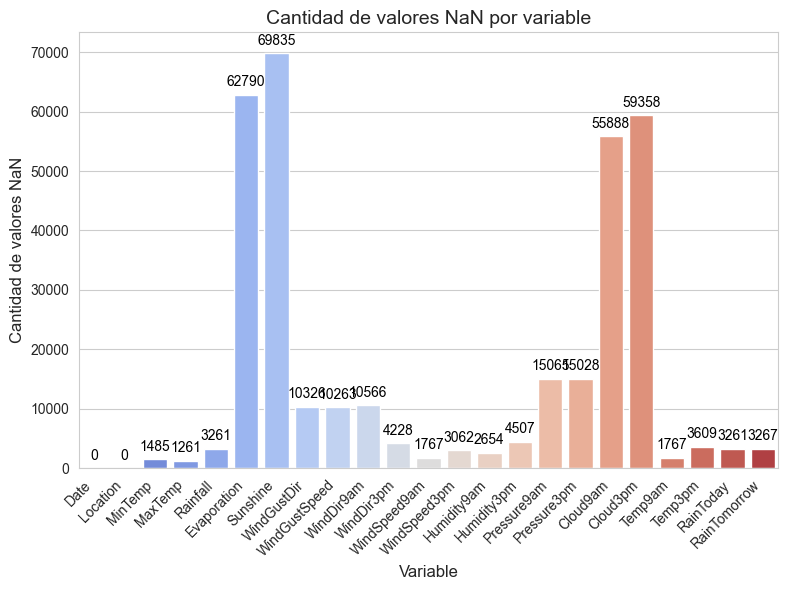

In [11]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))

barplot = sns.barplot(data=df_nan, x='Variable', y='Cant NaN', palette='coolwarm')
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Cantidad de valores NaN', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)  
plt.title('Cantidad de valores NaN por variable', fontsize=14)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=10,
                     color='black')

plt.tight_layout()
plt.show()


### Medidas de Resumen (imputación nan caso completo)

**Algunas pueden ser:**

- **Tendencia central**: media, mediana, moda
- **Dispersion**: desviación estandar, varianza, rango, percentiles
- **Forma**: oblicuidad, curtosis

**Muchas de estas, pueden ser calculadas rapidamente con el metodo .describe(). Informaremos las mismas de dos maneras:**

1) .describe()
2) Uso de funciones puntuales

**1) .describe()** : El método nos devuelve de cada variable númerica la cantidad, media, desviación estándar,mínimo, q1, q2 o mediana, q3 y maximo. Si lo vemos bien, aun nos da mas información, ya que podemos sacar el rango como rango=max-min y IQR como IQR=q3-q1

In [12]:
aus_weather_cleaned = aus_weather.dropna() # Se dropea valores (imputación por Caso Completo) nulos unicamente para poder hacer determinar algunas medidas de resumen y hacer algunas conclusiones. Luego, imputaremos mediante alguna estrategia los valores nan

In [13]:
aus_weather_cleaned.describe() 

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


**2) Uso de funciones puntuales:** en este punto eligiremos 5 primeras variables numericas y usaremos funciones de numpy o pandas para obtener distintas medidas de resumen

**2.1) Medidas de tendencia central**

In [14]:
print('Medias')
print('')
print(f'Media de MinTemp: {aus_weather_cleaned.MinTemp.mean():.2f}')
print(f'Media de MaxTemp: {aus_weather_cleaned.MaxTemp.mean():.2f}')
print(f'Media de Rainfall: {np.mean(aus_weather_cleaned.Rainfall):.2f}')
print(f'Media de Evaporation: {np.mean(aus_weather_cleaned.Evaporation):.2f}')
print(f'Media de Sunshine: {aus_weather_cleaned.Sunshine.mean():.2f}')
print('')

print('Medianas')
print('')
print(f'Mediana de MinTemp: {aus_weather_cleaned.MinTemp.median():.2f}')
print(f'Mediana de MaxTemp: {aus_weather_cleaned.MaxTemp.median():.2f}')
print(f'Mediana de Rainfall: {aus_weather_cleaned.Rainfall.median():.2f}')
print(f'Mediana de Evaporation: {aus_weather_cleaned.Evaporation.median():.2f}')
print(f'Mediana de Sunshine: {aus_weather_cleaned.Sunshine.median():.2f}')
print('')

print('Moda')
print('')
print(f'Moda de MinTemp: {stats.mode(aus_weather_cleaned.MinTemp)[0]:.2f}')
print(f'Moda de MaxTemp: {stats.mode(aus_weather_cleaned.MaxTemp)[0]:.2f}')
print(f'Moda de Rainfall: {stats.mode(aus_weather_cleaned.Rainfall)[0]:.2f}')
print(f'Moda de Evaporation: {stats.mode(aus_weather_cleaned.Evaporation)[0]:.2f}')
print(f'Moda de Sunshine: {stats.mode(aus_weather_cleaned.Sunshine)[0]:.2f}')



Medias

Media de MinTemp: 13.46
Media de MaxTemp: 24.22
Media de Rainfall: 2.13
Media de Evaporation: 5.50
Media de Sunshine: 7.74

Medianas

Mediana de MinTemp: 13.20
Mediana de MaxTemp: 23.90
Mediana de Rainfall: 0.00
Mediana de Evaporation: 5.00
Mediana de Sunshine: 8.60

Moda

Moda de MinTemp: 13.00
Moda de MaxTemp: 19.60
Moda de Rainfall: 0.00
Moda de Evaporation: 4.00
Moda de Sunshine: 0.00


**2.2) Medidas de Dispersión**

In [15]:
print('Desviación Estándar')
print('')
print(f'Desviación estándar de MinTemp: {aus_weather_cleaned.MinTemp.std():.2f}')
print(f'Desviación estándar de MaxTemp: {aus_weather_cleaned.MaxTemp.std():.2f}')
print(f'Desviación estándar de Rainfall: {np.std(aus_weather_cleaned.Rainfall):.2f}')
print(f'Desviación estándar de Evaporation: {np.std(aus_weather_cleaned.Evaporation):.2f}')
print(f'Desviación estándar de Sunshine: {aus_weather_cleaned.Sunshine.std():.2f}')
print('')

print('Varianza')
print('')
print(f'Varianza de MinTemp: {aus_weather_cleaned.MinTemp.var():.2f}')
print(f'Varianza de MaxTemp: {aus_weather_cleaned.MaxTemp.var():.2f}')
print(f'Varianza de Rainfall: {np.var(aus_weather_cleaned.Rainfall):.2f}')
print(f'Varianza de Evaporation: {np.var(aus_weather_cleaned.Evaporation):.2f}')
print(f'Varianza de Sunshine: {aus_weather_cleaned.Sunshine.var():.2f}')
print('')

print('Rango')
print('')
print(f'Rango de MinTemp: {aus_weather_cleaned.MinTemp.max() - aus_weather_cleaned.MinTemp.min():.2f}')
print(f'Rango de MaxTemp: {aus_weather_cleaned.MaxTemp.max() - aus_weather_cleaned.MaxTemp.min():.2f}')
print(f'Rango de Rainfall: {aus_weather.Rainfall.max() - aus_weather.Rainfall.min():.2f}')
print(f'Rango de Evaporation: {aus_weather_cleaned.Evaporation.max() - aus_weather_cleaned.Evaporation.min():.2f}')
print(f'Rango de Sunshine: {aus_weather_cleaned.Sunshine.max() - aus_weather_cleaned.Sunshine.min():.2f}')
print('')

print('Cuantiles')
print('')

variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']
# cuantiles para cada variable 
for var in variables:
    print(f"Variable: {var}")
    for i in np.arange(0.25, 1, 0.25):
        print(f'Cuantil {i}: {aus_weather_cleaned[var].quantile(i):.2f}')
    print('')

Desviación Estándar

Desviación estándar de MinTemp: 6.42
Desviación estándar de MaxTemp: 6.97
Desviación estándar de Rainfall: 7.01
Desviación estándar de Evaporation: 3.70
Desviación estándar de Sunshine: 3.76

Varianza

Varianza de MinTemp: 41.17
Varianza de MaxTemp: 48.59
Varianza de Rainfall: 49.21
Varianza de Evaporation: 13.66
Varianza de Sunshine: 14.12

Rango

Rango de MinTemp: 38.10
Rango de MaxTemp: 44.00
Rango de Rainfall: 371.00
Rango de Evaporation: 81.20
Rango de Sunshine: 14.50

Cuantiles

Variable: MinTemp
Cuantil 0.25: 8.60
Cuantil 0.5: 13.20
Cuantil 0.75: 18.40

Variable: MaxTemp
Cuantil 0.25: 18.70
Cuantil 0.5: 23.90
Cuantil 0.75: 29.70

Variable: Rainfall
Cuantil 0.25: 0.00
Cuantil 0.5: 0.00
Cuantil 0.75: 0.60

Variable: Evaporation
Cuantil 0.25: 2.80
Cuantil 0.5: 5.00
Cuantil 0.75: 7.40

Variable: Sunshine
Cuantil 0.25: 5.00
Cuantil 0.5: 8.60
Cuantil 0.75: 10.70



**2.3) Medidas de Forma**

In [16]:
print('Oblicuidad')
print('')
print(f'Oblicuidad de MinTemp: {stats.skew(aus_weather_cleaned.MinTemp):.2f}')
print(f'Oblicuidad de MaxTemp: {stats.skew(aus_weather_cleaned.MaxTemp):.2f}')
print(f'Oblicuidad de Rainfall: {stats.skew(aus_weather_cleaned.Rainfall):.2f}')
print(f'Oblicuidad de Evaporation: {stats.skew(aus_weather_cleaned.Evaporation):.2f}')
print(f'Oblicuidad de Sunshine: {stats.skew(aus_weather_cleaned.Sunshine):.2f}')


Oblicuidad

Oblicuidad de MinTemp: 0.05
Oblicuidad de MaxTemp: 0.19
Oblicuidad de Rainfall: 7.50
Oblicuidad de Evaporation: 2.23
Oblicuidad de Sunshine: -0.55


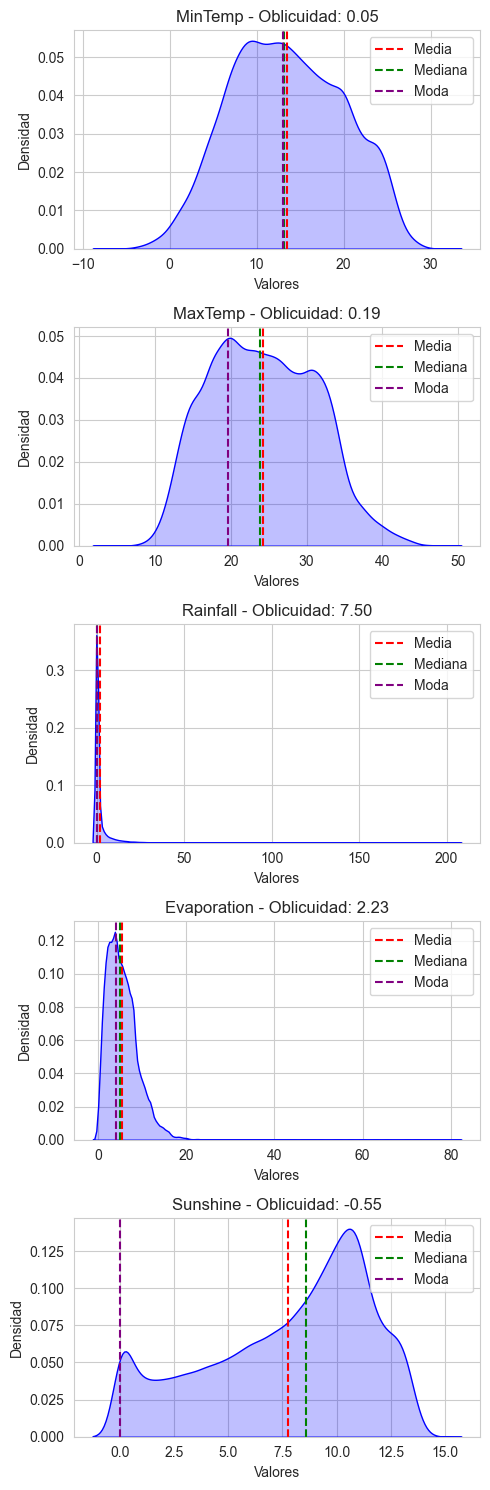

In [17]:
variables = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']

# Crear subgráficos para cada variable
fig, axs = plt.subplots(5, figsize=(5, 15))

# Iterar sobre cada variable y crear un gráfico para cada una
for i, variable in enumerate(variables):
    # Calcular media, mediana, moda y oblicuidad
    media = np.mean(aus_weather_cleaned[variable])
    mediana = np.median(aus_weather_cleaned[variable])
    moda = stats.mode(aus_weather_cleaned[variable])[0]
    skewness = stats.skew(aus_weather_cleaned[variable])
    
    # gráfico de densidad (campana de Gauss)
    sns.kdeplot(data=aus_weather_cleaned[variable], ax=axs[i], color='blue', fill=True)
    
    # líneas verticales para media, mediana y moda
    axs[i].axvline(x=media, color='red', linestyle='--', label='Media')
    axs[i].axvline(x=mediana, color='green', linestyle='--', label='Mediana')
    axs[i].axvline(x=moda, color='purple', linestyle='--', label='Moda')
    
    axs[i].set_title(f'{variable} - Oblicuidad: {skewness:.2f}')
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Densidad')

    
    axs[i].legend()

plt.tight_layout()
plt.show()

**De los valores anteriores y graficos podemos sacar algunas conclusiones**

**1)MinTemp: tiene una distrubución relativamente simetrica,con un pequeño sesgo a la derecha, dado que posee una oblicuidad cercana a 0 (0.05). Esto tambien se puede ver comparando los valores de media, mediana y moda en donde los 3 estadisticos son similares, 13.46,13.2 y 13 respectivamente.Gráficamente, podemos observar que  las lineas roja, verde y violeta estan muy proximas (media, mediana, moda)**

**2)MaxTemp: tiene una distribución con un pequeño sesgo a la derecha dado que posee un oblicuidad de de 0.19. Podemos observar esta asimetria derecha numericamente  mediante la revisión/comparación de los valores de moda, median y media. La moda es el menor valor con 19.60, luego tenemos la mediana con un valor 23.90 y por último la media con un valor de 24.22. Graficamente, podemos observar primero a la moda (violeta) y luego alejadas de ella la mediana (verde) y luego la media (roja)**

**3) Rainfall y Evaporation: ambas distribuciones sesgadas a la derecha con valores de oblicuidad de 7.5 y 2.23. Puede verse gráficamente que en ambas variables tenemos una cola livianas derecha pero que Rainfall es una distribución con mayor curtosis que Evaporation. Esto lo veremos a continucion mediante el calculo de curtosis de las variables**

**4) Sunshine: a esta variable hay que ponerle un poco más de atención ya que se define como la cantidad de horas de sol durante el dia y tiene como moda al valor 0. Este valor hay que tomarlo a priori como "incorrecto" ya que todos los dias se registra al menos una cantidad finita de horas. Por lo que se va a proceder, a hacer dos analisis de simetria:**

- **Con valores distintos de 0:** Se realizará un análisis de simetría para los valores distintos de 0 en la variable Sunshine.
- **Reemplazar valores 0 por mediana:** Se procederá a reemplazar los valores 0 por la mediana de la variable Sunshine. La mediana se elige en lugar de la media debido a que es menos sensible a posibles valores atípicos (outliers) que podrían estar presentes en la variable.



**Retirando valores 0 de atributo Sunshine**

In [18]:

aus_weather_cleaned_Sunshine=aus_weather_cleaned.loc[aus_weather_cleaned['Sunshine']!=0]

In [19]:
aus_weather_cleaned_Sunshine[aus_weather_cleaned_Sunshine['Sunshine']==0].sum() # visualiza cantidad de registros en todos las variables que poseen un registro cuando Sunshine = 0

Date               0
Location           0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir        0
WindGustSpeed    0.0
WindDir9am         0
WindDir3pm         0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday          0
RainTomorrow       0
dtype: object

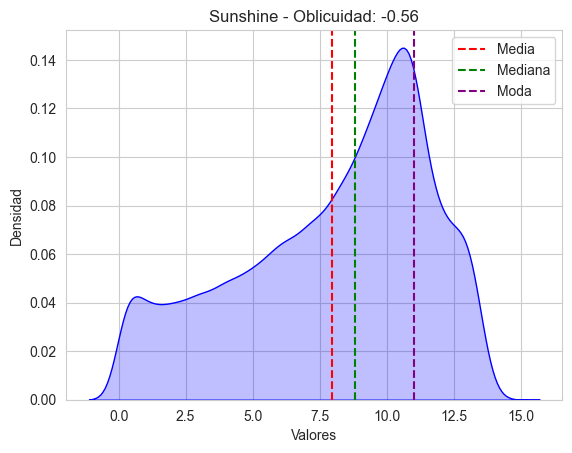

In [20]:
media = np.mean(aus_weather_cleaned_Sunshine['Sunshine'])
mediana = np.median(aus_weather_cleaned_Sunshine['Sunshine'])
moda_result = stats.mode(aus_weather_cleaned_Sunshine['Sunshine'])[0]

skewness = stats.skew(aus_weather_cleaned_Sunshine['Sunshine'])


sns.kdeplot(data=aus_weather_cleaned_Sunshine['Sunshine'], color='blue', fill=True)

plt.axvline(x=media, color='red', linestyle='--', label='Media')
plt.axvline(x=mediana, color='green', linestyle='--', label='Mediana')
if isinstance(moda_result, np.ndarray):
    for mode_val in moda_result:
        plt.axvline(x=mode_val, color='purple', linestyle='--', label='Moda')
else:
    plt.axvline(x=moda_result, color='purple', linestyle='--', label='Moda')


plt.title(f'Sunshine - Oblicuidad: {skewness:.2f}')
plt.xlabel('Valores')
plt.ylabel('Densidad')


plt.legend()

plt.show()





**En este primer análisis, podemos ver una distribución sesgada a la izquierda con valor de oblicuidad de -0.56 en donde gráficamente lo podemos visualizar encontrando primero a la media, luego a la mediana y por ultima a nuestra nueva moda, obtenida de retirar las valores 0 del dataset.**

**Aclaración: el valor de oblicuidad no se vio afectado dado que stats utiliza por defecto la formula de Fisher, con la formula estandarizada de orden 3, pero si en cambio utilizamos la formula de pearson que compara media con mediana podremos ver la diferencia.**

In [21]:
skew_pearson_sunshine=(aus_weather_cleaned['Sunshine'].mean()-stats.mode(aus_weather_cleaned['Sunshine'])[0])/aus_weather_cleaned['Sunshine'].std()
skew_pearson_sunshine_ajusted=(aus_weather_cleaned_Sunshine['Sunshine'].mean()-stats.mode(aus_weather_cleaned_Sunshine['Sunshine'])[0])/aus_weather_cleaned_Sunshine['Sunshine'].std()

In [22]:
print('La oblicuidad mediante la fórmula Pearson antes de retirar los 0 de las variables es', skew_pearson_sunshine) 
print('La oblicuidad mediante la fórmula Pearson despues de retirar los 0 de las variables es', skew_pearson_sunshine_ajusted)

La oblicuidad mediante la fórmula Pearson antes de retirar los 0 de las variables es 2.058358192151586
La oblicuidad mediante la fórmula Pearson despues de retirar los 0 de las variables es -0.8507975714670337


**El valor de oblicuidad,antes de retirar los valores 0 (~2.06), es positivo y nos detalla que la media es mayor que la moda por lo que indicaria que la distribución estaria sesgada a la derecha pero como explicamos antes esto se debe a que la moda de esta distribución era el valor 0 que puede encontrarse incorrecto, por definición de variable, por lo que luego, el nuevo valor de oblicuidad es negativo (~0.85,un poco mayor al obtenido mediante fisher en stats.models) indicando que la distribucion se encuentra sesgada a la izquieda**

In [23]:
# mediana_sunshine=aus_weather_cleaned.Sunshine.median()

# mediana_sunshine

In [24]:
mediana_sunshine_=aus_weather_cleaned[aus_weather_cleaned['Sunshine']!=0].Sunshine.median()

mediana_sunshine_

8.8

In [25]:
aus_weather_cleaned_Sunshine_median=aus_weather_cleaned.copy()

In [26]:
aus_weather_cleaned_Sunshine_median['Sunshine']=aus_weather_cleaned_Sunshine_median['Sunshine'].replace(0,mediana_sunshine_)

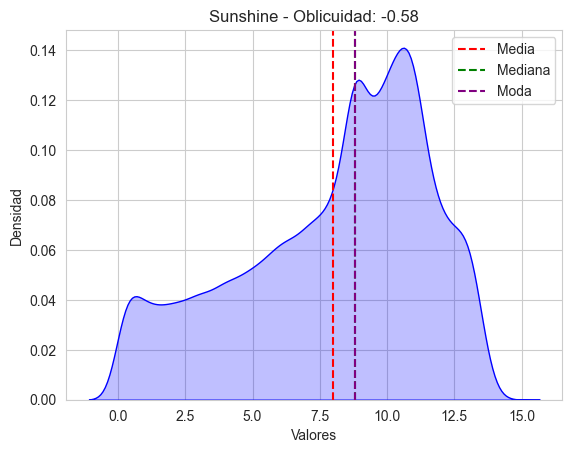

In [27]:
media = aus_weather_cleaned_Sunshine_median['Sunshine'].mean()
mediana = aus_weather_cleaned_Sunshine_median['Sunshine'].median()
moda_result = stats.mode(aus_weather_cleaned_Sunshine_median['Sunshine'])[0]

skewness = stats.skew(aus_weather_cleaned_Sunshine_median['Sunshine'])


sns.kdeplot(data=aus_weather_cleaned_Sunshine_median['Sunshine'], color='blue', fill=True)

plt.axvline(x=media, color='red', linestyle='--', label='Media')
plt.axvline(x=mediana, color='green', linestyle='--', label='Mediana')
if isinstance(moda_result, np.ndarray):
    for mode_val in moda_result:
        plt.axvline(x=mode_val, color='purple', linestyle='--', label='Moda')
else:
    plt.axvline(x=moda_result, color='purple', linestyle='--', label='Moda')


plt.title(f'Sunshine - Oblicuidad: {skewness:.2f}')
plt.xlabel('Valores')
plt.ylabel('Densidad')


plt.legend()

plt.show()

**En el segundo analisis, al reemplazar las valores 0 (ex moda) por la mediana, la mediana se covierte ahora tambien en moda. Se puede observar, numericamente (~0.58) y graficamente (media< moda=mediana) la asimetria izquierda.**

**Podemos revisar,nuevamente, como varia la oblicuidad con la fórmula de Pearson**

In [28]:
skew_pearson_sunshine_ajusted_median=(aus_weather_cleaned_Sunshine_median['Sunshine'].mean()-stats.mode(aus_weather_cleaned_Sunshine_median['Sunshine'])[0])/aus_weather_cleaned_Sunshine_median['Sunshine'].std()

In [29]:
print('La oblicuidad mediante la fórmula Pearson antes de retirar los 0 de las variables es', skew_pearson_sunshine) 
print('La oblicuidad mediante la fórmula Pearson despues de ajustar los 0  con median de las variables es', skew_pearson_sunshine_ajusted_median)

La oblicuidad mediante la fórmula Pearson antes de retirar los 0 de las variables es 2.058358192151586
La oblicuidad mediante la fórmula Pearson despues de ajustar los 0  con median de las variables es -0.22945731173494857


**Como mencionamos anteriormente, el valor de oblicuidad,antes de retirar los valores 0 (~2.06), es positivo y nos detalla que la media es mayor que la moda por lo que indicaria que la distribución estaria sesgada a la derecha pero como explicamos antes esto se debe a que la moda de esta distribución era el valor 0 que puede encontrarse como incorrecto, simplemente por definición de variable, por lo que luego, al ajustar estos valor con la mediana de la distribucion(sin tomar los valores 0), el nuevo valor de oblicuidad es negativo (~0.23,un poco menor al obtenido mediante fisher en stats.models) indicando que la distribucion se encuentra sesgada a la izquieda**

**Haremos el analisis de curtusis mediante curtosis de Pearson (curtosis por exceso). Usaremos también los kdeplot, anteriormente generados para revisar la oblicuidad, para poder caracterizar las colas de las distribuciones**

In [30]:
print('Curtosis')
print('')

for variable in ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']:
    curtosis = stats.kurtosis(aus_weather_cleaned[variable],fisher=False)
    descripcion_curtosis = ""
    if curtosis > 3:
        descripcion_curtosis = "leptocúrtica"
    elif curtosis < 3:
        descripcion_curtosis = "platicúrtica"
    else:
        descripcion_curtosis = "mesocúrtica"
    print(f'Curtosis de {variable}: {curtosis:.2f} ({descripcion_curtosis})')


Curtosis

Curtosis de MinTemp: 2.27 (platicúrtica)
Curtosis de MaxTemp: 2.32 (platicúrtica)
Curtosis de Rainfall: 98.33 (leptocúrtica)
Curtosis de Evaporation: 22.03 (leptocúrtica)
Curtosis de Sunshine: 2.23 (platicúrtica)


**MinTemp, MaxTemp y Sunshine: poseen una curtosis negativa por lo que se denominan distribuciones platicurticas. Sus valores estan proximos a cero por las colas son muy levemente pesadas asemajandose a distribuciones mesocurticas. Lo anterior descripto, se puede visualizar en los gráficos 1,2 y 5, realizados en el análisis de simetria/oblicuidad**

**Rainfall y Evaporation: poseen una curtosis positiva por lo que se denomina distribucion  leptocurticas, es decir que poseen, colas livianas, ya que la gran mayoria de los valores se situan en la cercania de la media. Lo antes descripto, sse puede visualizar en los gráficos 3 y4, realizados en el análisis de simetria/oblicuidad**

**A continuación, se presentas graficos de barras comparativos entre las curtosisi obtenidad y el de una distribución normal estándar**

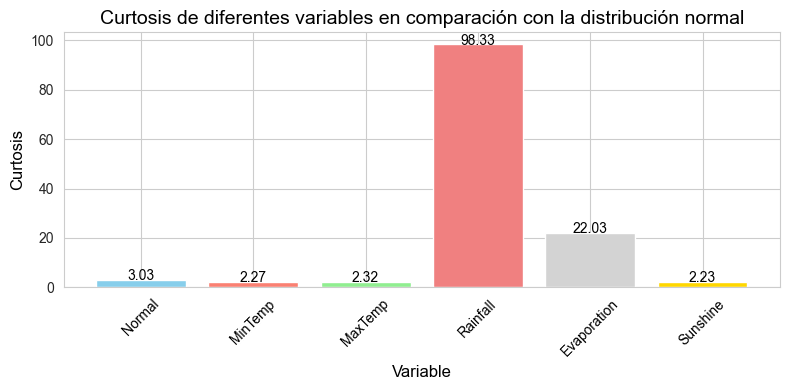

In [31]:
# Seteo de semilla
random_seed=np.random.seed(74)

# Generar datos normales estándar para comparar
data_normal = np.random.normal(0, 1, 10000)  # Distribución normal

kurt_normal = stats.kurtosis(data_normal, fisher=False)
kurt_Mintemp = stats.kurtosis(aus_weather_cleaned['MinTemp'], fisher=False)
kurt_Maxtemp = stats.kurtosis(aus_weather_cleaned['MaxTemp'], fisher=False)
kurt_Rainfall = stats.kurtosis(aus_weather_cleaned['Rainfall'], fisher=False)
kurt_Evaporation = stats.kurtosis(aus_weather_cleaned['Evaporation'], fisher=False)
kurt_Sunshine = stats.kurtosis(aus_weather_cleaned['Sunshine'], fisher=False)

# Etiquetas de las distribuciones
variables = ['Normal', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']

kurtosis = [kurt_normal, kurt_Mintemp, kurt_Maxtemp, kurt_Rainfall, kurt_Evaporation, kurt_Sunshine]

# Colores para las barras
colores = ['skyblue', 'salmon', 'lightgreen', 'lightcoral', 'lightgrey', 'gold']


plt.figure(figsize=(8, 4))
bars = plt.bar(variables, kurtosis, color=colores)

# Agregar valor encima de cada barra
for bar, val in zip(bars, kurtosis):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.05, round(val, 2),
             ha='center', color='black', fontsize=10)


plt.title('Curtosis de diferentes variables en comparación con la distribución normal', color='black', fontsize=14)
plt.xlabel('Variable', color='black', fontsize=12)
plt.ylabel('Curtosis', color='black', fontsize=12)


plt.xticks(rotation=45, color='black', fontsize=10)  
plt.tight_layout()  
plt.show()






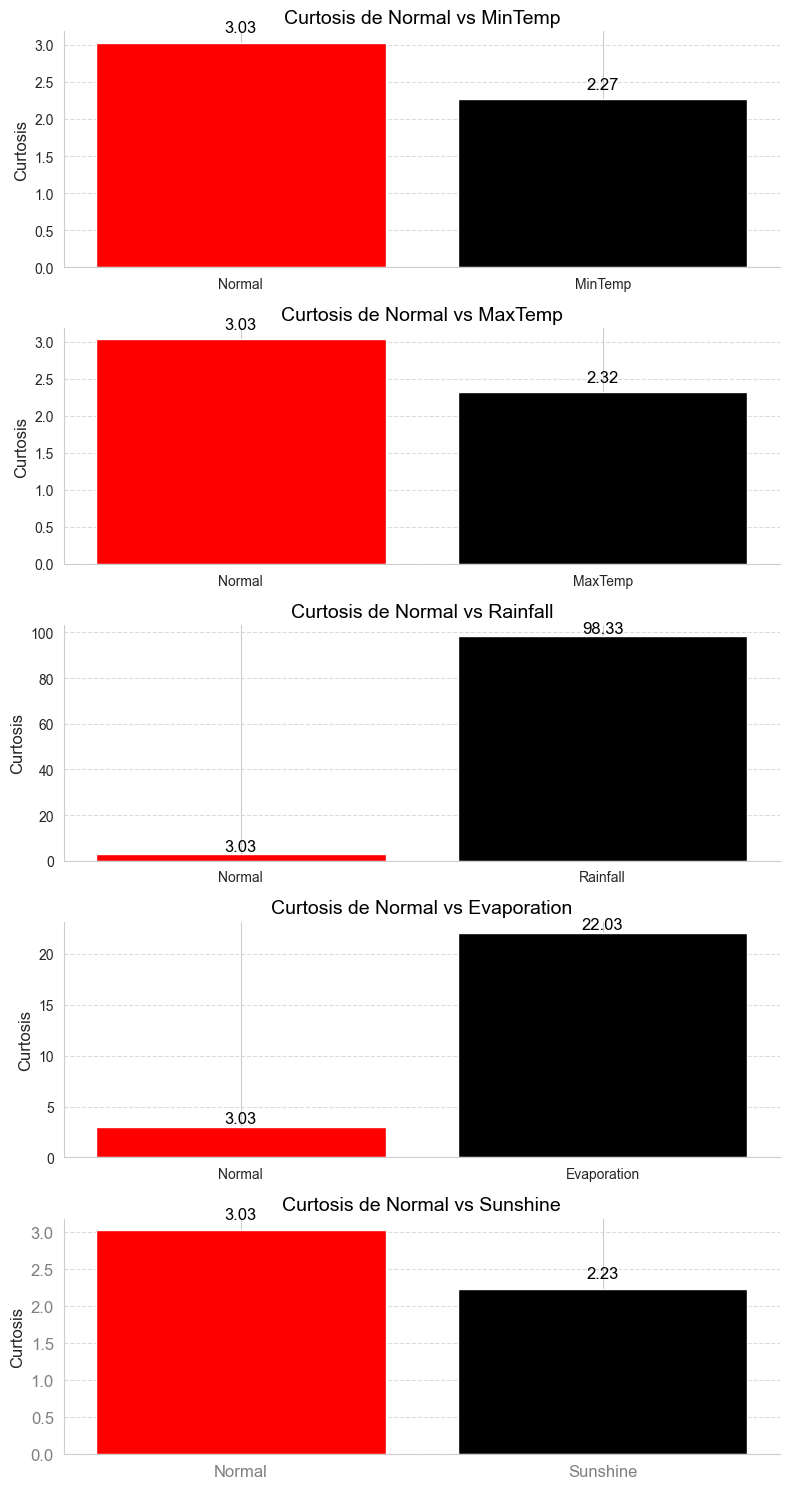

In [32]:

variables_climaticas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']


fig, axes = plt.subplots(5, 1, figsize=(8, 15))

for i, variable in enumerate(variables_climaticas):
    kurt_variable = stats.kurtosis(aus_weather_cleaned[variable], fisher=False)
    
    colors = ['red', 'black']
    
    ax = axes[i]
    bars = ax.bar(['Normal', variable], [kurt_normal, kurt_variable], color=colors)
    

    ax.set_title(f'Curtosis de Normal vs {variable}', fontsize=14, fontweight='normal', color='black')
    ax.set_ylabel('Curtosis', fontsize=12)
    

    plt.xticks(fontsize=12, color='grey')
    plt.yticks(fontsize=12, color='grey')
 
    for j, kurtosis_val in enumerate([kurt_normal, kurt_variable]):
        ax.text(bars[j].get_x() + bars[j].get_width() / 2, bars[j].get_height() + 0.1, f'{kurtosis_val:.2f}',
                ha='center', va='bottom', fontsize=12, color='black')
    

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Balanceo de Clases

Proporción de clases desbalanceadas:
No: 75.84%
Yes: 21.91%
nan: 2.25%


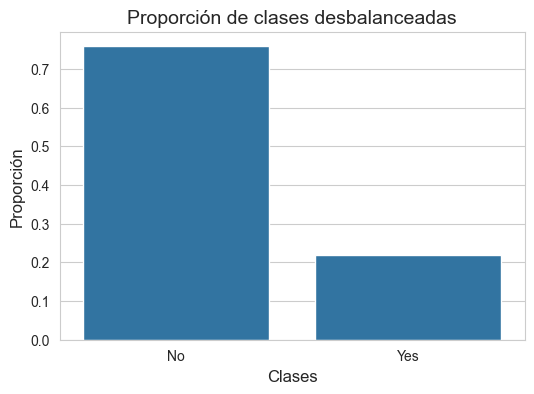

In [33]:
class_proportions = aus_weather['RainTomorrow'].value_counts(normalize=True, dropna=False) # dropna en false para contabilizar los valores NaN
print("Proporción de clases desbalanceadas:")
for label, proportion in class_proportions.items():
    print(f"{label}: {proportion:.2%}")

plt.figure(figsize=(6, 4))
sns.barplot(x=class_proportions.index, y=class_proportions.values)

plt.xlabel('Clases', fontsize=12)
plt.ylabel('Proporción', fontsize=12)
plt.title('Proporción de clases desbalanceadas', fontsize=14)

plt.show()

### Mapeo de variables categóricas booleanas

In [34]:
mapping_var = { 'Yes': 1, 'No': 0 } # Diccionario de conversión
aus_weather['RainTomorrow'] = aus_weather['RainTomorrow'].map(mapping_var) # mapeo de variables categoricas booleanas a numericas flotantes
aus_weather['RainToday'] = aus_weather['RainToday'].map(mapping_var)

### Matríz de Correlación (sin imputar datos)

In [35]:
#!pip install tabulate

from tabulate import tabulate

In [36]:
var_num = ['MaxTemp', 'MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']
aus_weather_num = aus_weather[var_num].copy()
matrix_corr = aus_weather_num.corr() # matríz de correlación

# Convertir la matriz de correlación a un DataFrame para mantener los nombres de las variables
matrix_corr_df = pd.DataFrame(round(matrix_corr,2), columns=var_num, index=var_num)
matrix_corr_df

,MaxTemp,MinTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Cloud9am,Cloud3pm,RainToday,RainTomorrow
MaxTemp,1.00,0.74,-0.07,0.59,0.47,0.07,0.01,0.05,-0.29,-0.28,-0.23,-0.16
MinTemp,0.74,1.00,0.10,0.47,0.07,0.18,0.18,0.18,0.08,0.02,0.06,0.08
Rainfall,-0.07,0.10,1.00,-0.06,-0.23,0.13,0.09,0.06,0.20,0.17,0.50,0.24
Evaporation,0.59,0.47,-0.06,1.00,0.37,0.20,0.19,0.13,-0.18,-0.18,-0.19,-0.12
Sunshine,0.47,0.07,-0.23,0.37,1.00,-0.03,0.01,0.05,-0.68,-0.70,-0.33,-0.45
WindGustSpeed,0.07,0.18,0.13,0.20,-0.03,1.00,0.61,0.69,0.07,0.11,0.16,0.23
WindSpeed9am,0.01,0.18,0.09,0.19,0.01,0.61,1.00,0.52,0.03,0.05,0.10,0.09
WindSpeed3pm,0.05,0.18,0.06,0.13,0.05,0.69,0.52,1.00,0.05,0.03,0.08,0.09
Cloud9am,-0.29,0.08,0.20,-0.18,-0.68,0.07,0.03,0.05,1.00,0.60,0.31,0.32
Cloud3pm,-0.28,0.02,0.17,-0.18,-0.70,0.11,0.05,0.03,0.60,1.00,0.27,0.38


### Mapa de calor entre variables (sin imputar datos)

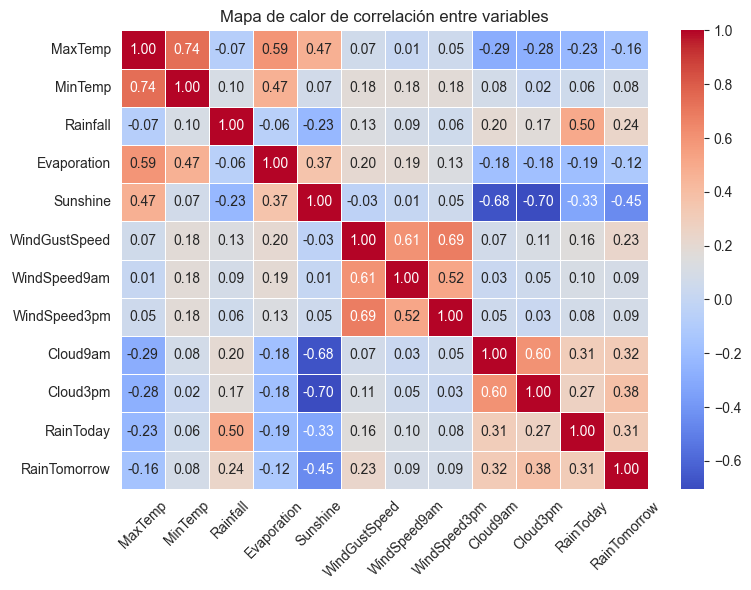

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Mapa de calor de correlación entre variables')
plt.xticks(rotation=45)  
plt.yticks(rotation=0)  
plt.tight_layout()    

plt.show()

Observando la matriz de correlación y el mapa de calor entre las variables, podemos hacer las siguientes observaciones:

- **MaxTemp y MinTemp**: Tienen una relación directa moderada de aproximadamente 0.74, lo que indica que a medida que aumenta la temperatura máxima, también tiende a aumentar la temperatura mínima, y viceversa. En este punto se debe revisar detenidamente cual de las dos variables se considerará ingresar al modelo para evitar multicolinealidad. A priori, viendo el heatmap, en el caso que se decida incluir alguno de los dos features se eligiría MinTemp dado que tiene un relación directa con RainTomorrow de 0.08 (leve) mientras que MaxTemp tiene una relación inversa -0.16 (leve) siendo la primera posiblemente más informativa. De igual manera, es importante mencionar que ambas variables mediante analisis de correlación son muy poco informativas con RainTomorrow.

- **Rainfall y Sunshine**: Tienen una relación inversa leve de alrededor de -0.23, lo que sugiere que a medida que aumenta la cantidad de lluvia (ml), tiende a disminuir la cantidad de horas de sol.

- **MaxTemp y Evaporation**: Tienen una relación directa moderada de aproximadamente 0.59, lo que indica que a medida que aumenta la temperatura máxima, tiende a aumentar la evaporación.

- **Cloud9am, Cloud3pm, Sunshine**: Tienen relaciones inversas moderadas con Sunshine, de alrededor de -0.68 y -0.70 respectivamente. Esto sugiere que a medida que aumenta la cobertura de nubes a las 9am y a las 3pm, tiende a disminuir la cantidad de horas de sol. Pensando en el modelo a implementar, con el objetivo de predecir la variable RainTomorrow, podemos ver que la relación entre Cloud9am y Cloud3pm es directa y moderada con r=0.6, por lo tanto se deberá revisar detenidamente cual de las dos variables se considerará ingresar al modelo para evitar multicolinealidad. A priori, viendo el heatmap, se incluiría Cloud3pm dado que tiene un relación directa más fuerte con RainTomorrow con un coeficiente de Pearson de 0.38 mientras que Cloud9am tiene uno de 0.32 siendo la primera posiblemente más informativa e indicando a priori que la cobertura de nubes por la tarde tienen más relación con lluvias al dia siguiente que la cobertura de nubes por la mañana.

- **Rainfall, RainToday, RainTomorrow**: Rainfall y RainTodat tienen una relación directa moderada positiva de aproximadamente 0.50, lo que indica que la cantidad de lluvia en milimetros está moderadamente relacionada con si lloverá hoy. Pero, si revisamos que relación tiene Rainfall con RainTomorrow la situación cambia ya que la relación continua siendo directa pero ahora es leve con coeficiente de pearson de 0.24 indicando que es menos informativa para esta.

Estas observaciones nos proporcionan información sobre cómo están relacionadas entre sí las diferentes variables meteorológicas en el conjunto de datos. Por ejemplo, nos dicen que la temperatura máxima y la evaporación tienden a aumentar juntas, mientras que la cantidad de lluvia está inversamente relacionada con la cantidad de horas de sol.


#### Boxplot de las variables numéricas (imputación nan caso completo)

Límite Superior del Bigote de MaxTemp: 43.65
Límite Inferior del Bigote de MaxTemp: 2.45
Límite Superior del Bigote de MinTemp: 30.85
Límite Inferior del Bigote de MinTemp: -6.35
Límite Superior del Bigote de Rainfall: 2.0
Límite Inferior del Bigote de Rainfall: -1.2
Límite Superior del Bigote de Evaporation: 14.6
Límite Inferior del Bigote de Evaporation: -4.6
Límite Superior del Bigote de Sunshine: 19.3
Límite Inferior del Bigote de Sunshine: -3.9
Límite Superior del Bigote de WindGustSpeed: 73.5
Límite Inferior del Bigote de WindGustSpeed: 5.5
Límite Superior del Bigote de WindSpeed9am: 37.0
Límite Inferior del Bigote de WindSpeed9am: -11.0
Límite Superior del Bigote de WindSpeed3pm: 40.5
Límite Inferior del Bigote de WindSpeed3pm: -3.5
Límite Superior del Bigote de Cloud9am: 16.0
Límite Inferior del Bigote de Cloud9am: -8.0
Límite Superior del Bigote de Cloud3pm: 14.5
Límite Inferior del Bigote de Cloud3pm: -5.5
Límite Superior del Bigote de RainToday: 0.0
Límite Inferior del Bigot

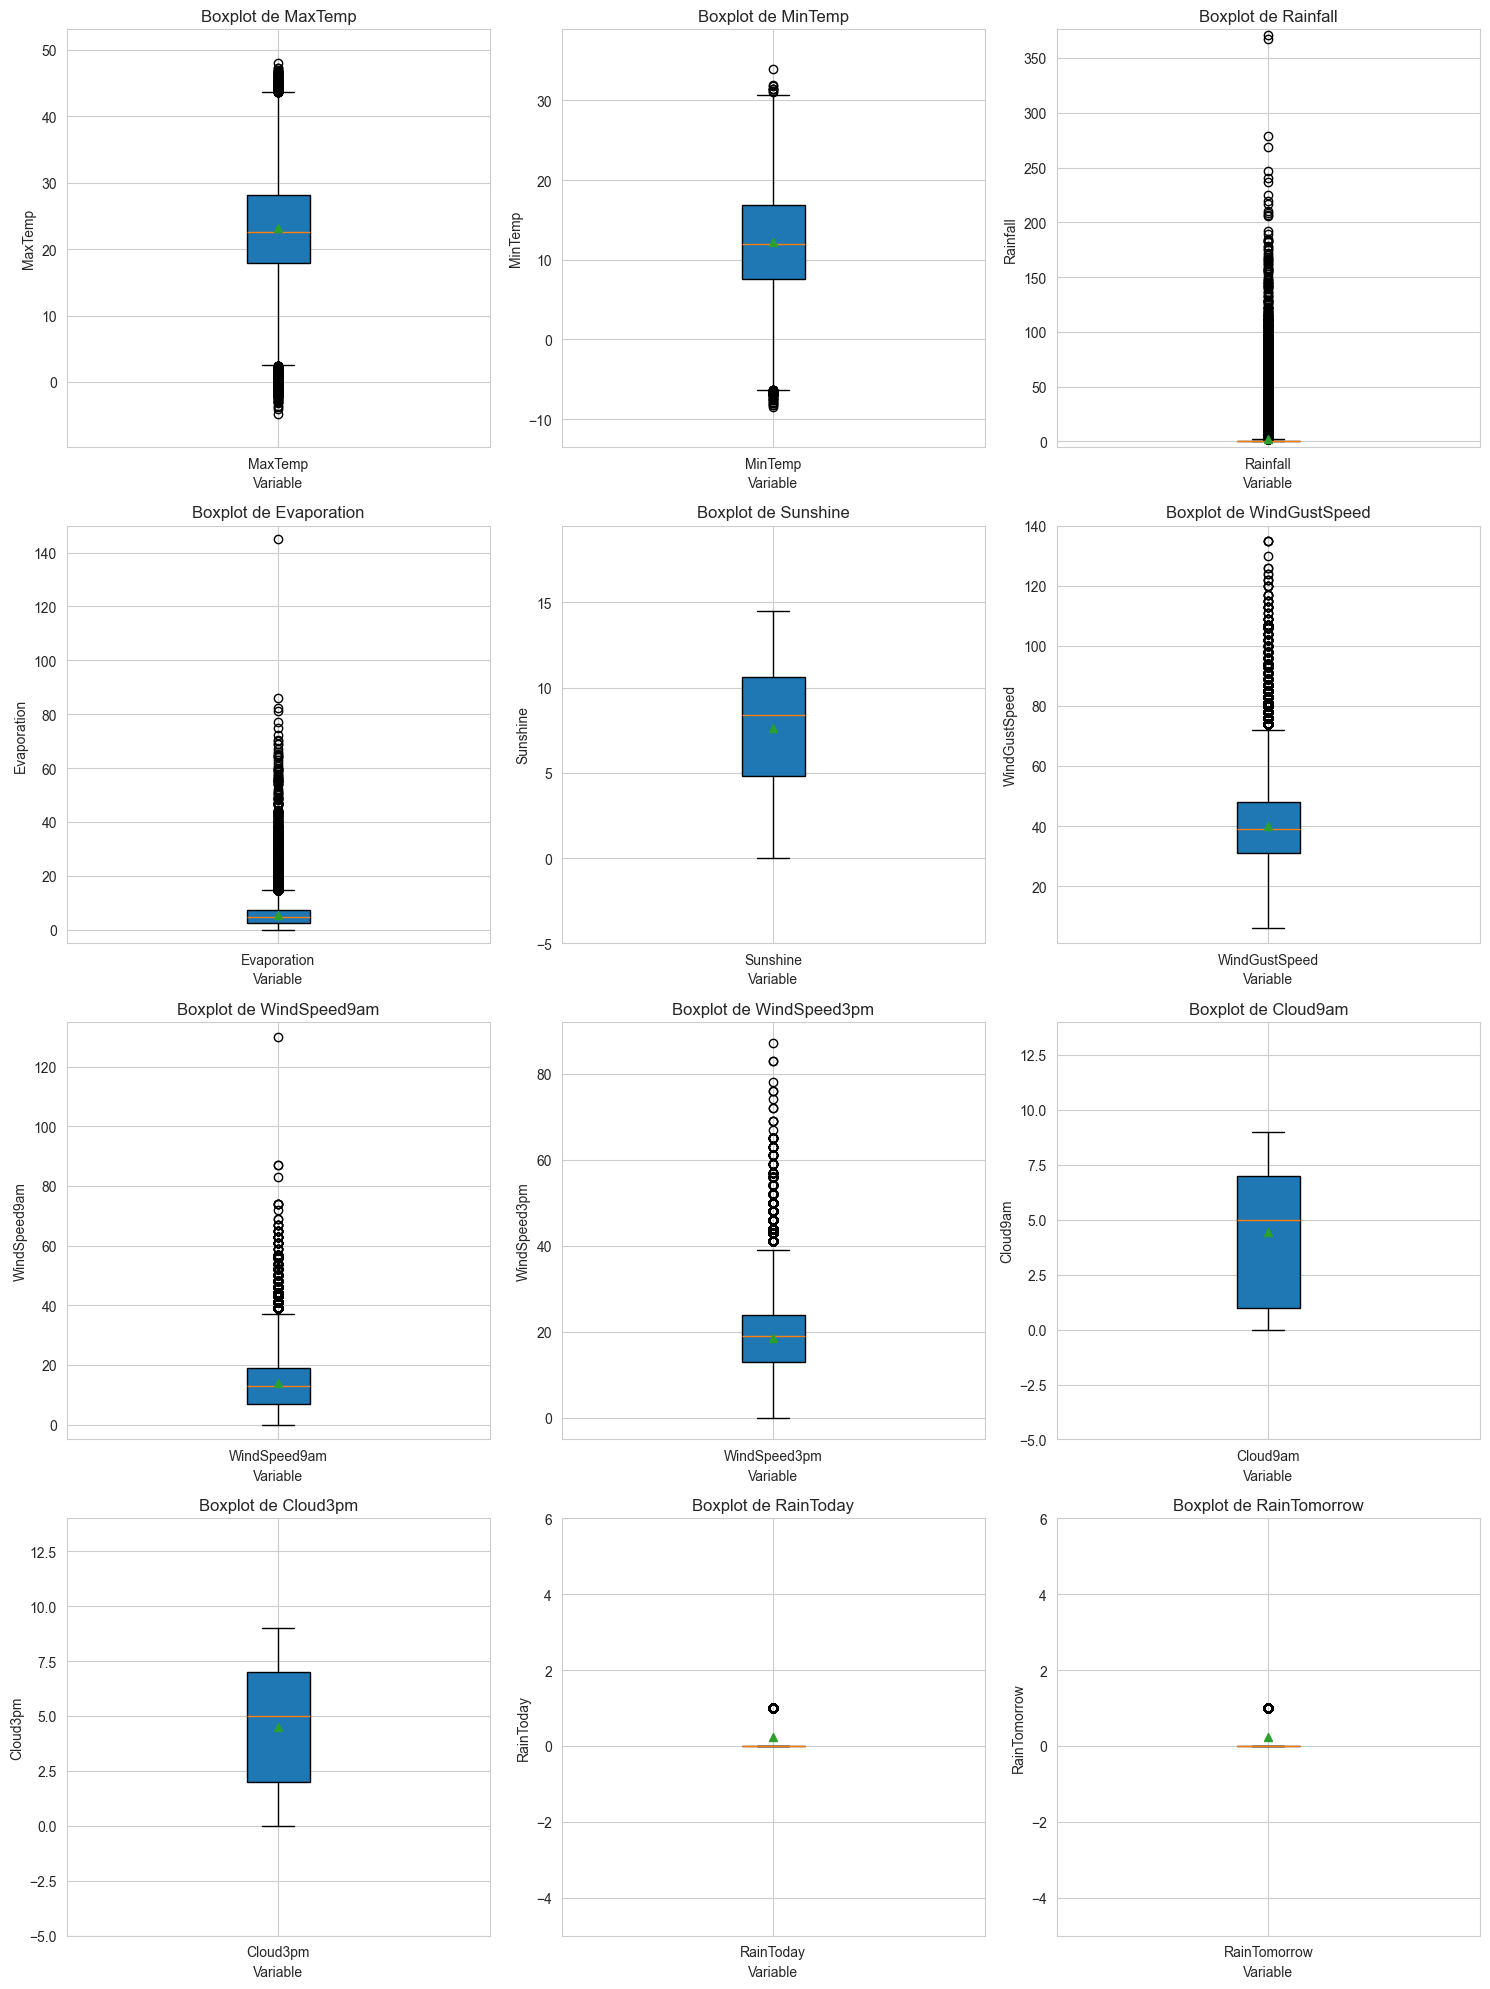

In [38]:
num_rows = len(var_num) // 3
if len(var_num) % 3 != 0:
    num_rows += 1

plt.figure(figsize=(15, 5*num_rows))

# Iterar sobre las variables numéricas y crear un boxplot para cada una
for idx, var in enumerate(var_num):
    # Datos de la variable actual
    data = aus_weather_num[var].dropna() # quitando los valores NaN
    
    # Configurar el subplot
    plt.subplot(num_rows, 3, idx+1)
    
    # Crear el boxplot
    plt.boxplot(data.values, labels=[var], patch_artist=True, showmeans=True)
    
    # Título y etiquetas de los ejes
    plt.title(f"Boxplot de {var}")
    plt.xlabel("Variable")
    plt.ylabel(var)
    
    # Ajustar los límites del eje y para una mejor visualización
    plt.ylim(data.values.min() - 5, data.values.max() + 5)
    
    # Calcular e imprimir los límites del bigote
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    bigote_low = q1 - (1.5 * iqr)
    bigote_up = q3 + (1.5 * iqr)
    print(f'Límite Superior del Bigote de {var}:', round(bigote_up,2))
    print(f'Límite Inferior del Bigote de {var}:', round(bigote_low,2))
    
    # Mostrar el grid
    plt.grid(True)

# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

Basándonos en los límites del bigote calculados para cada variable, podemos hacer algunas observaciones sobre los potenciales valores atípicos o outliers (método de IQR):

- **MaxTemp**: El límite superior del bigote es 43.65°C y el límite inferior es 2.45°C. Esto sugiere que cualquier valor de temperatura por encima de 43.65°C o por debajo de 2.45°C se consideraría un valor atípico.

- **MinTemp**: El límite superior del bigote es 30.85°C y el límite inferior es -6.35°C. Similar a MaxTemp, cualquier valor de temperatura por encima de 30.85°C o por debajo de -6.35°C se consideraría un valor atípico.

- **Rainfall**: El límite superior del bigote es 2.0 mm y el límite inferior es -1.2 mm. Cualquier valor de precipitación por encima de 2.0 mm se consideraría un valor atípico.

- **Evaporation**: El límite superior del bigote es 14.6 mm y el límite inferior es -4.6 mm. Cualquier valor de evaporación por encima de 14.6 mm o por debajo de -4.6 mm se consideraría un valor atípico.

- **Sunshine**: El límite superior del bigote es 19.3 horas y el límite inferior es -3.9 horas. Cualquier valor de horas de sol por encima de 19.3 horas o por debajo de -3.9 horas se consideraría un valor atípico.

- **WindGustSpeed**: El límite superior del bigote es 73.5 km/h y el límite inferior es 5.5 km/h. Cualquier valor de velocidad del viento por encima de 73.5 km/h o por debajo de 5.5 km/h se consideraría un valor atípico.

- **WindSpeed9am**: El límite superior del bigote es 37.0 km/h y el límite inferior es -11.0 km/h. Cualquier valor de velocidad del viento a las 9am por encima de 37.0 km/h o por debajo de -11.0 km/h se consideraría un valor atípico.

- **WindSpeed3pm**: El límite superior del bigote es 40.5 km/h y el límite inferior es -3.5 km/h. Cualquier valor de velocidad del viento a las 3pm por encima de 40.5 km/h o por debajo de -3.5 km/h se consideraría un valor atípico.

- **Cloud9am**: El límite superior del bigote es 16.0 y el límite inferior es -8.0. Cualquier valor de nubosidad a las 9am por encima de 16.0 o por debajo de -8.0 se consideraría un valor atípico.

- **Cloud3pm**: El límite superior del bigote es 14.5 y el límite inferior es -5.5. Cualquier valor de nubosidad a las 3pm por encima de 14.5 o por debajo de -5.5 se consideraría un valor atípico.

- **RainToday** y **RainTomorrow**: En estos boxplots podemos observar la influencia del desbalanceo de clases en estas variables. Al tener +75 % de valores con valor 0 (no lloverá hoy y/o mañana) nos encontramos que tanto q1,q2,q3, IQR son iguales a 0. Por consiguiente, los bigotes tambien serán iguales a 0 ya que se calculan en funcion del IQR (=0). El valor que se detalla en el boxplot como potencial valor atipico NO LO ES, simplemente es la representación de los mÚltiples registros con valor 1 (lloverá hoy y/o mañana) en el dataset. Este ejemplo, es importante detallarlo para poder entender que no siempre lo que arroja a priori una prueba o grÁfico es la realidad, y que es crucial conocer la naturaleza de los mismos, interpretarlos, analizarlos para luego decidir que hacer con ellos.

Estas observaciones nos pueden ayudar a identificar potenciales valores inusuales en los datos y pueden ser útiles para el análisis y la interpretación de los resultados.


### Resumen de outliers por IQR (con imputación nan caso completo)

In [39]:
# !pip install Jinja2

In [40]:
results_list = []

# Itera sobre las variables numéricas y calcular los outliers
for var in var_num:
    df_var = aus_weather_num[var].reset_index().drop(['index'], axis=1)
    
    # Calcular outliers superiores e inferiores
    outliers_top = df_var[df_var[var] > bigote_up]
    cant_outliers_top = outliers_top[var].count()
    
    outliers_down = df_var[df_var[var] < bigote_low]
    cant_outliers_down = outliers_down[var].count()
    
    # Obtener la cantidad total de datos, el valor máximo y el valor mínimo
    cant_total = len(df_var)
    valor_max = aus_weather_num[var].max()
    valor_min = aus_weather_num[var].min()
    
    results_list.append({
        'Variable': var,
        'Cant. Outliers Superiores': cant_outliers_top,
        'Cant. Outliers Inferiores': cant_outliers_down,
        'Cantidad Total': cant_total,
        'Valor Máximo': valor_max,
        'Valor Mínimo': valor_min
    })

results = pd.DataFrame(results_list)

styled_results = results.style.set_table_styles([
    {'selector': 'caption', 'props': [('color', 'grey'), ('font-size', '18px')]},
    {'selector': 'th', 'props': [('background-color', 'black'), ('color', 'white'), ('font-size', '14px'), ('font-weight', 'bold')]},
    {'selector': 'td', 'props': [('font-size', '14px')]}
]).set_caption('Resumen de potenciales Outliers por método de IQR ')

styled_results

,Variable,Cant. Outliers Superiores,Cant. Outliers Inferiores,Cantidad Total,Valor Máximo,Valor Mínimo
0,MaxTemp,144072,113,145460,48.100000,-4.800000
1,MinTemp,140352,3464,145460,33.900000,-8.500000
2,Rainfall,51119,0,145460,371.000000,0.000000
3,Evaporation,82426,0,145460,145.000000,0.000000
4,Sunshine,73266,0,145460,14.500000,0.000000
5,WindGustSpeed,135197,0,145460,135.000000,6.000000
6,WindSpeed9am,134948,0,145460,130.000000,0.000000
7,WindSpeed3pm,141286,0,145460,87.000000,0.000000
8,Cloud9am,80930,0,145460,9.000000,0.000000
9,Cloud3pm,81128,0,145460,9.000000,0.000000


### Analisis de datos ausentes

**Para visualizar la cantidad de valores ausentes en cada columna:**

In [41]:
aus_weather.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Para visualizar la cantidad de valores ausentes en todo el dataset**

In [42]:
total_nan=aus_weather.isna().sum().sum()

print("En el dataset se encuentran un total", total_nan, "de valores ausentes")

En el dataset se encuentran un total 343248 de valores ausentes


**También, hay que analizar que porcentaje del total corresponde a valores nan o ausentes. Esto es clave para analizar que estrategia se va tomar para imputar estos como con la columna que los contiene**

In [43]:
df_nan=aus_weather.isnull().sum().reset_index()
df_nan.columns=['Variable','Cant NaN']
df_nan ['Porc NaN']= round(df_nan['Cant NaN']/aus_weather.shape[0] * 100,2)

df_nan

,Variable,Cant NaN,Porc NaN
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,1485,1.02
3,MaxTemp,1261,0.87
4,Rainfall,3261,2.24
5,Evaporation,62790,43.17
6,Sunshine,69835,48.01
7,WindGustDir,10326,7.10
8,WindGustSpeed,10263,7.06
9,WindDir9am,10566,7.26


/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_93309/70989044.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_nan, x='Variable', y='Cant NaN', palette='coolwarm')


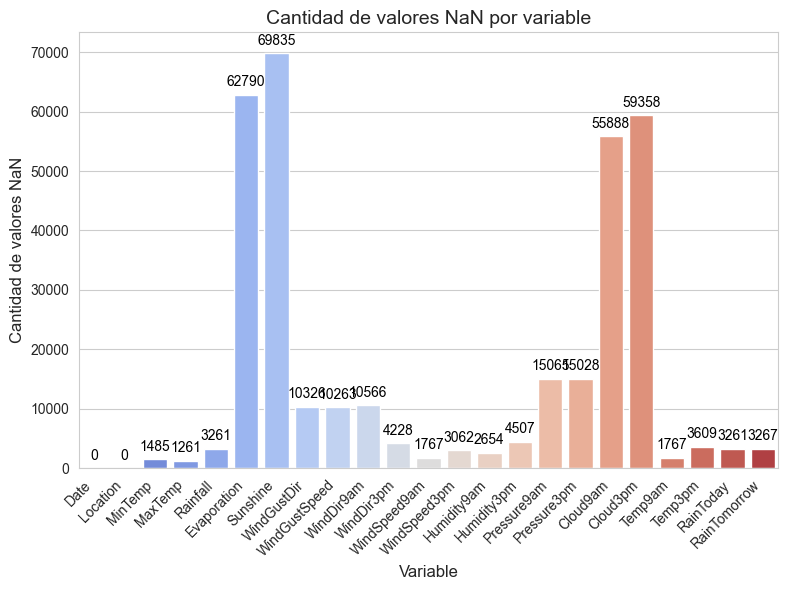

In [44]:
sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))

barplot = sns.barplot(data=df_nan, x='Variable', y='Cant NaN', palette='coolwarm')
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Cantidad de valores NaN', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10) 
plt.yticks(fontsize=10)  
plt.title('Cantidad de valores NaN por variable', fontsize=14)

for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points',
                     fontsize=10,
                     color='black')

plt.tight_layout()
plt.show()


**Adaptoremos la siguiente estrategia:**
- **Eliminar registros en donde variable RainTomorrow y RainToday es NaN**
- **Volver a revisar porcentajes de NaN**.
    - **Columnas que posean más de 5% de valores de ausentes será eliminado del analisis**
    - **Columnas que posean menos 5 % de valores de ausentes se los imputara**

In [45]:
aus_weather_=aus_weather.dropna(subset=['RainTomorrow','RainToday'])

In [46]:
df_nan=aus_weather_.isnull().sum().reset_index()
df_nan.columns=['Variable','Cant NaN']
df_nan ['Porc NaN']= round(df_nan['Cant NaN']/aus_weather_.shape[0] * 100,2)

df_nan

,Variable,Cant NaN,Porc NaN
0,Date,0,0.00
1,Location,0,0.00
2,MinTemp,468,0.33
3,MaxTemp,307,0.22
4,Rainfall,0,0.00
5,Evaporation,59694,42.40
6,Sunshine,66805,47.45
7,WindGustDir,9163,6.51
8,WindGustSpeed,9105,6.47
9,WindDir9am,9660,6.86


In [47]:
delete_variables=df_nan[df_nan['Porc NaN']>5]['Variable']

delete_variables_array=np.array(delete_variables)

delete_variables_array

array(['Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm'],
      dtype=object)

In [48]:
df_ausweather=aus_weather_.drop(columns=delete_variables_array)

df_ausweather


,Date,Location,MinTemp,MaxTemp,Rainfall,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,WNW,20.0,24.0,71.0,22.0,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,WSW,4.0,22.0,44.0,25.0,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,19.0,26.0,38.0,30.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,E,11.0,9.0,45.0,16.0,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NW,7.0,20.0,82.0,33.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,15.0,13.0,59.0,27.0,9.4,20.9,0.0,0.0
145455,2017-06-21,Uluru,2.8,23.4,0.0,ENE,13.0,11.0,51.0,24.0,10.1,22.4,0.0,0.0
145456,2017-06-22,Uluru,3.6,25.3,0.0,N,13.0,9.0,56.0,21.0,10.9,24.5,0.0,0.0
145457,2017-06-23,Uluru,5.4,26.9,0.0,WNW,9.0,9.0,53.0,24.0,12.5,26.1,0.0,0.0


In [49]:
df_ausweather.WindDir3pm.isnull().sum()

categorias_WindDir3pm=df_ausweather.WindDir3pm.dropna().unique()

cardinalidad_WindDir3pm=len(categorias_WindDir3pm)

print(f"La variable WindDir3pm es una variable cualiatativa nominal y posee las siguientes categoria es: {categorias_WindDir3pm} y su cardinalidad es {cardinalidad_WindDir3pm}")


La variable WindDir3pm es una variable cualiatativa nominal y posee las siguientes categoria es: ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE'] y su cardinalidad es 16


**Dado a la alta cardinalidad de la variable WinDir3pm y sabido que una cardinalidad alta introduce mucha complejidad al modelo, al hacer un one hot encoding de esta variable tendriamos que agregar 16-1 columnas para poder describir el comportamiento de la misma y claremente haria propenso a overfitear a nuestro futuro modelo. Por tal motivo, se decide eliminar dicho atributo.**

In [50]:
df_ausweather=df_ausweather.drop(columns='WindDir3pm')


In [51]:
df_ausweather.head() # Verificamos que se haya elminado WindDir3pm

,Date,Location,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7,0.0,0.0


In [52]:
df_nan_=df_ausweather.isnull().sum().reset_index()
df_nan_.columns=['Variable','Cant NaN']
df_nan_ ['Porc NaN']= round(df_nan_['Cant NaN']/df_ausweather.shape[0] * 100,2)

print(df_nan_)

        Variable  Cant NaN  Porc NaN
0           Date         0      0.00
1       Location         0      0.00
2        MinTemp       468      0.33
3        MaxTemp       307      0.22
4       Rainfall         0      0.00
5   WindSpeed9am      1055      0.75
6   WindSpeed3pm      2531      1.80
7    Humidity9am      1517      1.08
8    Humidity3pm      3501      2.49
9        Temp9am       656      0.47
10       Temp3pm      2624      1.86
11     RainToday         0      0.00
12  RainTomorrow         0      0.00


**Utilizaremos el metodo multivariado MICE, que "imputa" los valores ausentes de cada columna como una Regresón Lineal de las restantantes**

In [53]:
#!pip install fancyimpute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

fecha_location=df_ausweather[['Date','Location']].reset_index()
df_sin_fecha=df_ausweather.iloc[:,2:]
imputer=IterativeImputer(max_iter=100,random_state=74,initial_strategy='median',tol=1e-2)
ausweather_imputed=imputer.fit_transform(df_sin_fecha)

df_ausweather_sin_fecha_imputed=pd.DataFrame(ausweather_imputed, columns=df_sin_fecha.columns).reset_index()

df_ausweather_imputed=pd.concat([fecha_location,df_ausweather_sin_fecha_imputed], axis=1)





In [54]:
# Verificación de valores nan
df_nan_imputed=df_ausweather_imputed.isnull().sum().reset_index()
df_nan_imputed.columns=['Variable','Cant NaN']
df_nan_imputed['Porc NaN']= round(df_nan_imputed['Cant NaN']/df_ausweather_imputed.shape[0] * 100,2)

df_nan_imputed

,Variable,Cant NaN,Porc NaN
0,index,0,0.0
1,Date,0,0.0
2,Location,0,0.0
3,index,0,0.0
4,MinTemp,0,0.0
5,MaxTemp,0,0.0
6,Rainfall,0,0.0
7,WindSpeed9am,0,0.0
8,WindSpeed3pm,0,0.0
9,Humidity9am,0,0.0


In [55]:
# Visualizo df final
df_ausweather_imputed.head()


,index,Date,Location,index,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,2008-12-01,Albury,0,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8,0.0,0.0
1,1,2008-12-02,Albury,1,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3,0.0,0.0
2,2,2008-12-03,Albury,2,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2,0.0,0.0
3,3,2008-12-04,Albury,3,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5,0.0,0.0
4,4,2008-12-05,Albury,4,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7,0.0,0.0


In [56]:
# Elimino columna index
df_ausweather_imputed.drop('index',axis=1, inplace=True)


In [57]:
# Corroboro que se haya elimindado index
df_ausweather_imputed.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,20.0,24.0,71.0,22.0,16.9,21.8,0.0,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,4.0,22.0,44.0,25.0,17.2,24.3,0.0,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,19.0,26.0,38.0,30.0,21.0,23.2,0.0,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,11.0,9.0,45.0,16.0,18.1,26.5,0.0,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,7.0,20.0,82.0,33.0,17.8,29.7,0.0,0.0


### Análisis de outliers e imputación

La variable='MinTemp' posee 62 potenciales outliers mediante el método de IQR
La variable='MaxTemp' posee 438 potenciales outliers mediante el método de IQR
La variable='Rainfall' posee 25228 potenciales outliers mediante el método de IQR
La variable='WindSpeed9am' posee 1715 potenciales outliers mediante el método de IQR
La variable='WindSpeed3pm' posee 2429 potenciales outliers mediante el método de IQR
La variable='Humidity9am' posee 1415 potenciales outliers mediante el método de IQR
La variable='Humidity3pm' posee 2 potenciales outliers mediante el método de IQR
La variable='Temp9am' posee 260 potenciales outliers mediante el método de IQR
La variable='Temp3pm' posee 658 potenciales outliers mediante el método de IQR


/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_93309/2480454428.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columnas_num,y=outliers_counts,palette='viridis')


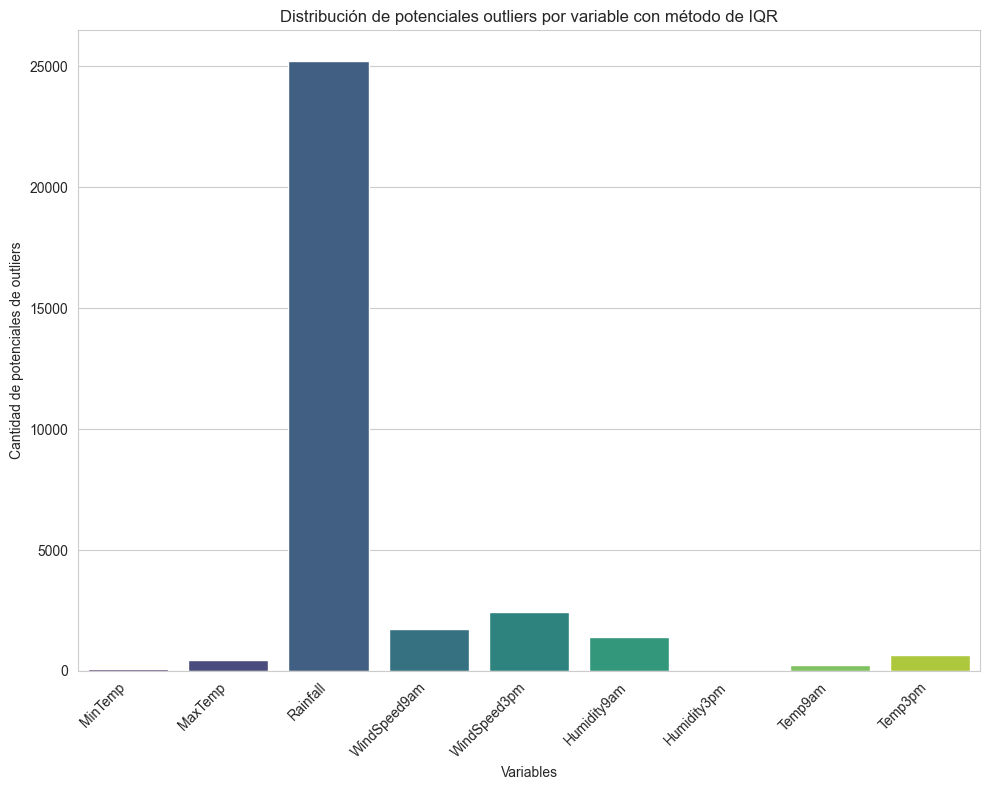

In [58]:

columnas_num=df_ausweather_imputed.iloc[:,2:-2].columns #las ultimas dos variables son targets y dummies por ende no se deben revisar

outliers_counts=[]

for variable in columnas_num:

    q1=np.percentile(df_ausweather_imputed[variable],25)
    q3=np.percentile(df_ausweather_imputed[variable],75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr

    n_outliers=((df_ausweather_imputed[variable]<lower_bound ) | (df_ausweather_imputed[variable]>upper_bound)).sum()
    outliers_counts.append(n_outliers)

    print(f"La {variable=} posee {n_outliers} potenciales outliers mediante el método de IQR")

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.barplot(x=columnas_num,y=outliers_counts,palette='viridis')
plt.title("Distribución de potenciales outliers por variable con método de IQR")
plt.xlabel('Variables')
plt.ylabel('Cantidad de potenciales de outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Imputación:**
- **Rainfall: dado la cantidad de outliers presente por el metodo de analizará e imputara de forma de independiente al resto de las variables**
- **Resto de variables: se realizará una imputación por valores cercanos, es decir, se reemplazaran por valores dentro al IQR. Ajustaremos los valores debajo de q1-1.5 x IQR por cuantil 25 y los valores por encima de q3+ 1.5 x IQR por el cuantil 75. Se evita trabajar con imputaciones de media (útil en distribuciones simetricas y con pocos outliers) y mediana (útil en distribuciones sesgadas) con el objetivo de preservar mejor las estructura original de los datos**

In [59]:
columnas=columnas_num.drop('Rainfall')

for col in columnas:
    Q1 = df_ausweather_imputed[col].quantile(0.25)
    Q3 = df_ausweather_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    
    # Reemplazamos los valores atípicos 
    df_ausweather_imputed[col] = np.where((df_ausweather_imputed[col] < lower_bound) | (df_ausweather_imputed[col] > upper_bound),
                                          np.where(df_ausweather_imputed[col] < lower_bound, df_ausweather_imputed[col].quantile(0.15), df_ausweather_imputed[col].quantile(0.90)),
                                          df_ausweather_imputed[col])
    
    n_outliers=((df_ausweather_imputed[col]<lower_bound ) | (df_ausweather_imputed[col]>upper_bound)).sum()
    
    print(f"La {col=} posee {n_outliers} potenciales outliers mediante el método de IQR")


La col='MinTemp' posee 0 potenciales outliers mediante el método de IQR
La col='MaxTemp' posee 0 potenciales outliers mediante el método de IQR
La col='WindSpeed9am' posee 0 potenciales outliers mediante el método de IQR
La col='WindSpeed3pm' posee 0 potenciales outliers mediante el método de IQR
La col='Humidity9am' posee 0 potenciales outliers mediante el método de IQR
La col='Humidity3pm' posee 0 potenciales outliers mediante el método de IQR
La col='Temp9am' posee 0 potenciales outliers mediante el método de IQR
La col='Temp3pm' posee 0 potenciales outliers mediante el método de IQR


In [60]:
# Analysis Rainfall

media_rainfall=df_ausweather_imputed.Rainfall.mean()
median_rainfall=df_ausweather_imputed.Rainfall.median()
mode_raifall=stats.mode(df_ausweather_imputed.Rainfall)
q1_rainfall=df_ausweather_imputed.Rainfall.quantile(0.25)
q3_rainfall=df_ausweather_imputed.Rainfall.quantile(0.75)
p95_rainfall=df_ausweather_imputed.Rainfall.quantile(0.95)
upper_bound_rainfall=q3_rainfall+1.5*(q3_rainfall-q1_rainfall)
std_rainfall=df_ausweather_imputed.Rainfall.std()
curtosis_rainfall=stats.kurtosis(df_ausweather_imputed.Rainfall)
skew_rainfall=stats.skew(df_ausweather_imputed.Rainfall)


print("Estadísticas de la columna 'Rainfall':")
print(f"Media: {media_rainfall}")
print(f"Mediana: {median_rainfall}")
print(f"Moda: {mode_raifall}")
print(f"Cuartil 1 (Q1): {q1_rainfall}")
print(f"Cuartil 3 (Q3): {q3_rainfall}")
print(f"Percentil 95: {p95_rainfall}")
print(f"El limite superior por IQR es {upper_bound_rainfall}")
print(f"Desviación estándar: {std_rainfall}")
print(f"Curtosis: {curtosis_rainfall}")
print(f"Oblicuidad: {skew_rainfall}")


Estadísticas de la columna 'Rainfall':
Media: 2.349974074310839
Mediana: 0.0
Moda: ModeResult(mode=0.0, count=90275)
Cuartil 1 (Q1): 0.0
Cuartil 3 (Q3): 0.8
Percentil 95: 13.0
El limite superior por IQR es 2.0
Desviación estándar: 8.465172917616462
Curtosis: 179.99566156053783
Oblicuidad: 9.887955716274256


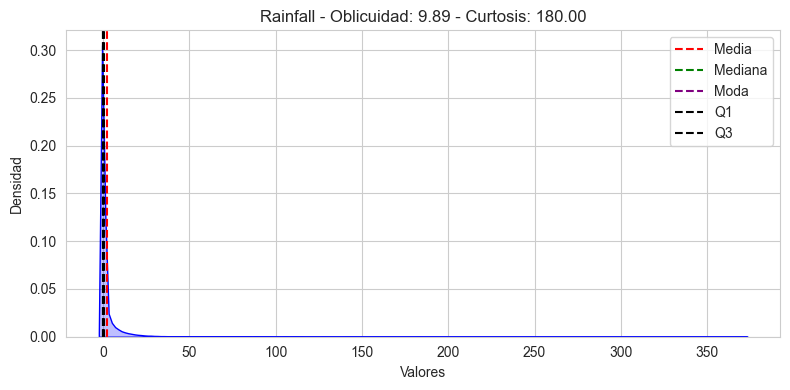

In [61]:

fig, axs = plt.subplots(1, 1, figsize=(8, 4))


sns.kdeplot(data=df_ausweather_imputed['Rainfall'], ax=axs, color='blue', fill=True)

# Líneas verticales para media, mediana, moda, q1 y q3
axs.axvline(x=media_rainfall, color='red', linestyle='--', label='Media')
axs.axvline(x=median_rainfall, color='green', linestyle='--', label='Mediana')
axs.axvline(x=mode_raifall[0], color='purple', linestyle='--', label='Moda')
axs.axvline(x=q1_rainfall, color='black', linestyle='--', label='Q1')
axs.axvline(x=q3_rainfall, color='black', linestyle='--', label='Q3')

# Configurar título y etiquetas de los ejes
axs.set_title(f'Rainfall - Oblicuidad: {skew_rainfall:.2f} - Curtosis: {curtosis_rainfall:.2f}')
axs.set_xlabel('Valores')
axs.set_ylabel('Densidad')


# Agregar leyenda
axs.legend()

# Ajustar diseño y mostrar gráfico
plt.tight_layout()
plt.show()


**Dado que la mayoria de los valores de concentran alrededor de la media y que el percentil 95 es un valor cohorente de caida de agua en un dia (13 ml). Se reemplazará todo valor por encima del valor 13 ml y al valor de la media**

In [62]:
df_ausweather_imputed['Rainfall'] = df_ausweather_imputed['Rainfall'].where(df_ausweather_imputed['Rainfall'] >=p95_rainfall , media_rainfall)

In [63]:
media_rainfall=df_ausweather_imputed.Rainfall.mean()
median_rainfall=df_ausweather_imputed.Rainfall.median()
mode_raifall=stats.mode(df_ausweather_imputed.Rainfall)
q1_rainfall=df_ausweather_imputed.Rainfall.quantile(0.25)
q3_rainfall=df_ausweather_imputed.Rainfall.quantile(0.75)
p95_rainfall=df_ausweather_imputed.Rainfall.quantile(0.95)
upper_bound_rainfall=q3_rainfall+1.5*(q3_rainfall-q1_rainfall)
std_rainfall=df_ausweather_imputed.Rainfall.std()
curtosis_rainfall=stats.kurtosis(df_ausweather_imputed.Rainfall)
skew_rainfall=stats.skew(df_ausweather_imputed.Rainfall)


print("Estadísticas de la columna 'Rainfall':")
print(f"Media: {media_rainfall}")
print(f"Mediana: {median_rainfall}")
print(f"Moda: {mode_raifall}")
print(f"Cuartil 1 (Q1): {q1_rainfall}")
print(f"Cuartil 3 (Q3): {q3_rainfall}")
print(f"Percentil 95: {p95_rainfall}")
print(f"El limite superior por IQR es {upper_bound_rainfall}")
print(f"Desviación estándar: {std_rainfall}")
print(f"Curtosis: {curtosis_rainfall}")
print(f"Oblicuidad: {skew_rainfall}")

Estadísticas de la columna 'Rainfall':
Media: 3.7141411032412646
Mediana: 2.349974074310839
Moda: ModeResult(mode=2.349974074310839, count=133709)
Cuartil 1 (Q1): 2.349974074310839
Cuartil 3 (Q3): 2.349974074310839
Percentil 95: 13.0
El limite superior por IQR es 2.349974074310839
Desviación estándar: 7.944909199000813
Curtosis: 224.7809463567342
Oblicuidad: 11.421746456197948


### Medidas resumen (con datos imputados)

In [64]:
# info general 
df_ausweather_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140787 entries, 0 to 140786
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          140787 non-null  object 
 1   Location      140787 non-null  object 
 2   MinTemp       140787 non-null  float64
 3   MaxTemp       140787 non-null  float64
 4   Rainfall      140787 non-null  float64
 5   WindSpeed9am  140787 non-null  float64
 6   WindSpeed3pm  140787 non-null  float64
 7   Humidity9am   140787 non-null  float64
 8   Humidity3pm   140787 non-null  float64
 9   Temp9am       140787 non-null  float64
 10  Temp3pm       140787 non-null  float64
 11  RainToday     140787 non-null  float64
 12  RainTomorrow  140787 non-null  float64
dtypes: float64(11), object(2)
memory usage: 14.0+ MB


In [65]:
df_ausweather_imputed.describe()

,MinTemp,MaxTemp,Rainfall,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000,140787.000000
mean,12.189811,23.252354,3.714141,13.765197,18.353595,69.274651,51.532131,16.974294,21.739172,0.223423,0.221618
std,6.388385,7.016079,7.944909,8.281695,8.105240,18.292446,20.762324,6.458782,6.836271,0.416541,0.415337
min,-6.200000,2.500000,2.349974,-0.659053,0.000000,18.000000,-5.974143,-1.700000,1.750096,0.000000,0.000000
25%,7.600000,17.900000,2.349974,7.000000,13.000000,57.000000,37.000000,12.200000,16.600000,0.000000,0.000000
50%,12.000000,22.600000,2.349974,13.000000,19.000000,70.000000,52.000000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,2.349974,19.000000,24.000000,83.000000,66.000000,21.500000,26.500000,0.000000,0.000000
max,30.500000,43.600000,371.000000,37.000000,40.183602,117.944589,102.255230,35.400000,41.300000,1.000000,1.000000


### Preguntas para ir contestando a medida que analizamos los datos:

##### 1- Cuántos días llovieron y cuantos no en el período analizado?

In [73]:
dias_con_lluvia = df_ausweather_imputed['RainToday'].sum()
dias_sin_lluvia = len(df_ausweather_imputed) - dias_con_lluvia

print(f"En el período analizado, el número de días con lluvia fue: {dias_con_lluvia}")
print(f"En el período analizado, el número de días sin lluvia fue: {dias_sin_lluvia}")

En el período analizado, el número de días con lluvia fue: 31455.0
En el período analizado, el número de días sin lluvia fue: 109332.0


##### 2- Qué mes/meses tuvo la mayor y menor cantidad de días con lluvia? / a que estación pertenece

In [67]:
import calendar

# se extrae el mes de la columna 'Date'
df_ausweather_imputed['Month'] = pd.to_datetime(df_ausweather_imputed['Date']).dt.month

# agrupamos los datos por mes y se cuentan los días con lluvia
dias_con_lluvia_por_mes = df_ausweather_imputed.groupby('Month')['RainToday'].sum()

# Encontrar el mes con la mayor cantidad de días de lluvia
mes_con_max_lluvia = dias_con_lluvia_por_mes.idxmax()
nombre_mes_max_lluvia = calendar.month_name[mes_con_max_lluvia]

# Encontrar el mes con la menor cantidad de días de lluvia
mes_con_min_lluvia = dias_con_lluvia_por_mes.idxmin()
nombre_mes_min_lluvia = calendar.month_name[mes_con_min_lluvia]

print(f"En el período analizado, el mes con la mayor cantidad de días de lluvia fue: {nombre_mes_max_lluvia} ({mes_con_max_lluvia})")
print(f"En el período analizado, el mes con la menor cantidad de días de lluvia fue: {nombre_mes_min_lluvia} ({mes_con_min_lluvia})")


En el período analizado, el mes con la mayor cantidad de días de lluvia fue: June (6)
En el período analizado, el mes con la menor cantidad de días de lluvia fue: February (2)


##### 3- Qué área/locación tuvo la mayor cantidad de días con lluvia?

In [76]:
dias_con_lluvia_por_locacion = df_ausweather_imputed.groupby('Location')['RainToday'].sum()

locacion_con_max_lluvia = dias_con_lluvia_por_locacion.idxmax()
max_lluvia = dias_con_lluvia_por_locacion.max()

print(f"La ubicación con la mayor cantidad de días de lluvia en el período analizado, es: {locacion_con_max_lluvia}, con {max_lluvia} días de lluvia.")

La ubicación con la mayor cantidad de días de lluvia en el período analizado, es: Portland, con 1088.0 días de lluvia.


##### 4- Cuánto llovió en promedio por día? (Cuántos milimetros de agua) cuando RainToday == Yes

In [75]:
# filtra los datos donde "RainToday" es "Yes"
lluvia_hoy = df_ausweather_imputed[df_ausweather_imputed['RainToday'] == 1]

# calcula el promedio de la columna "Rainfall"
promedio_lluvia_hoy = lluvia_hoy['Rainfall'].mean()

print(f"En el período analizado, el promedio de lluvia por día cuando RainToday es Yes es: {promedio_lluvia_hoy:.2f} mm")


En el período analizado, el promedio de lluvia por día cuando RainToday es Yes es: 8.46 mm


##### 5- Cuánto llovió en promedio por estación? (Crear columna estación según fecha)

In [74]:

# la columna 'Date' se pasa al tipo datetime
df_ausweather_imputed['Date'] = pd.to_datetime(df_ausweather_imputed['Date'])

# se definen las estaciones del año en base a los meses
# Luego hay que ajustarlo en base a las fechas específicas...
estaciones = {
    'Verano': [12, 1, 2],  # Diciembre, Enero, Febrero
    'Otoño': [3, 4, 5],     # Marzo, Abril, Mayo
    'Invierno': [6, 7, 8],   # Junio, Julio, Agosto
    'Primavera': [9, 10, 11] # Septiembre, Octubre, Noviembre
}

# nueva columna 'estación' basada en las estaciones definidas
df_ausweather_imputed['Estacion'] = df_ausweather_imputed['Date'].dt.month.map(
    lambda month: next((season for season, months in estaciones.items() if month in months), None)
)

# filtrado de datos solo para los días de lluvia
dias_lluvia = df_ausweather_imputed[df_ausweather_imputed['RainToday'] == 1]

# se agrupan los datos por estación y se cuentan los días de lluvia
dias_lluvia_por_estacion = dias_lluvia.groupby('Estacion').size()

print("Cantidad de días de lluvia por estación:")
print(dias_lluvia_por_estacion)

# filtrado de datos solo para los días de lluvia
dias_lluvia = df_ausweather_imputed[df_ausweather_imputed['RainToday'] == 1]

# se agrupan los datos por estación y se calcula la precipitación promedio con mean
promedio_lluvia_por_estacion = dias_lluvia.groupby('Estacion')['Rainfall'].mean()

print("Promedio de precipitación por estación (en mm):")
print(promedio_lluvia_por_estacion)

Cantidad de días de lluvia por estación:
Estacion
Invierno     9312
Otoño        8067
Primavera    7242
Verano       6834
dtype: int64
Promedio de precipitación por estación (en mm):
Estacion
Invierno      6.795963
Otoño         8.816641
Primavera     6.958927
Verano       11.877528
Name: Rainfall, dtype: float64


##### 6- La Temperatura media anual de las 9am no varía año a año? 
- Se plantea con un Test de hipotesis:
    - H0: La media anual de las 9am es igual a la media anual entre años es constante.
    - H1: La media anual de las 9am es distinta a la media anual entre años.

In [78]:
# Creación de grupos por año
df_ausweather_imputed['Year'] = pd.to_datetime(df_ausweather_imputed['Date']).dt.year

grupo_2008 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2008]['Temp9am']
grupo_2009 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2009]['Temp9am']
grupo_2010 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2010]['Temp9am']
grupo_2011 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2011]['Temp9am']
grupo_2012 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2012]['Temp9am']
grupo_2013 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2013]['Temp9am']
grupo_2014 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2014]['Temp9am']
grupo_2015 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2015]['Temp9am']
grupo_2016 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2016]['Temp9am']
grupo_2017 = df_ausweather_imputed[df_ausweather_imputed['Year'] == 2017]['Temp9am']

Test de Normalidad de los grupos (de cada uno de los años de la temperatura media de las 9am)

Test de Shapiro:
- H0: La muestra proviene de una distribucion normal
- H1: La muestra no proviene de una distribución normal


In [79]:
resultado_grupo1 = stats.shapiro(grupo_2008)
resultado_grupo2 = stats.shapiro(grupo_2009)
resultado_grupo3 = stats.shapiro(grupo_2010)
resultado_grupo4 = stats.shapiro(grupo_2011)
resultado_grupo5 = stats.shapiro(grupo_2012)
resultado_grupo6 = stats.shapiro(grupo_2013)
resultado_grupo7 = stats.shapiro(grupo_2014)
resultado_grupo8 = stats.shapiro(grupo_2015)
resultado_grupo9 = stats.shapiro(grupo_2016)
resultado_grupo10 = stats.shapiro(grupo_2017)

print(resultado_grupo1.pvalue)
print(resultado_grupo2.pvalue)
print(resultado_grupo3.pvalue)
print(resultado_grupo4.pvalue)
print(resultado_grupo5.pvalue)
print(resultado_grupo6.pvalue)
print(resultado_grupo7.pvalue)
print(resultado_grupo8.pvalue)
print(resultado_grupo9.pvalue)
print(resultado_grupo10.pvalue)

3.6495956174501426e-14
2.252195131929332e-25
3.726106095929677e-24
2.2179249085682912e-21
7.754505372347625e-20
5.147022392035557e-23
3.3009539575958264e-18
3.3017162802517885e-23
6.214871844902271e-31
8.376117204346123e-16


/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_93309/1956032501.py:2: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16514.
  resultado_grupo2 = stats.shapiro(grupo_2009)
/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_93309/1956032501.py:3: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16191.
  resultado_grupo3 = stats.shapiro(grupo_2010)
/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_93309/1956032501.py:4: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14983.
  resultado_grupo4 = stats.shapiro(grupo_2011)
/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_93309/1956032501.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14894.
  resultado_grupo5 = stats.shapiro(grupo_2012)
/var/folders/hw/ns58kp4d2bs0v9klnqn0n9rc0000gn/T/ipykernel_9

Se puede observar que en todos los grupos el p value asociado al test de Shapiro, es menor a 0.05, por lo que tenemos evidencia estadística para rechazar la hipótesis nula de normalidad.
Al no poder garantizar la normalidad de las muestras, replantearemos nuestra pregunta a la siguiente: 

**La mediana anual durante la mañana (9am), varía año a año?**
Por lo que plantearemos el siguiente test de hipótesis:

- Test de Kruskal:
- H0: La mediana de todos los grupos son iguales.
- H1: La mediana de al menos un grupo es diferente.

In [80]:
resultado_kruskal = stats.kruskal(grupo_2008, grupo_2009, grupo_2010, grupo_2011, grupo_2012, grupo_2013, grupo_2014, grupo_2015, grupo_2016, grupo_2017)
print(resultado_kruskal.pvalue)

7.626603161700216e-129


Podemos concluir, en función del p value devuelto por el test, de que al menos una mediana anual difiere del resto. Es decir, se rechaza la hipótesis nula.

##### 7- Cómo evoluciona la temperatura mínima y máxima durante todo el tiempo? (Serie de tiempo)

##### 8- Ver si hay patrones de cambio de temperatura en una estación. (Serie de tiempo)